In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
%matplotlib inline

# Maze Generation

Creates a randomly generated maze 

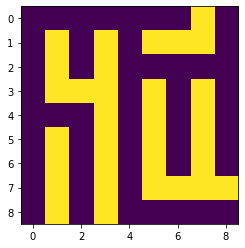

In [2]:

"""
    ==============================================
    GENERATE_MAZE
        input:
            n_cells (int) :     width of maze
    ==============================================
    Given a current cell as a parameter
    Mark the current cell as visited
    While the current cell has any unvisited neighbour cells
        Choose one of the unvisited neighbours
        Remove the wall between the current cell and the chosen cell
        Invoke the routine recursively for the chosen cell
"""
def generate_maze(n_cells):
    # Generate cells
    cells = np.zeros((n_cells * 2 + 1, n_cells * 2 + 1))
    cells[::2] = 1
    cells.T[::2] = 1

    # Create maze recursively
    visited = np.zeros((n_cells,n_cells))
    candidates = [[0,0]]
    while candidates != []:
        np.random.shuffle(candidates)
        if candidates == []:
            break
        candidate = np.array(candidates.pop())
        directions = [0,1,2,3]
        np.random.shuffle(directions)

        for direction in directions:
            # Get the neighbour coordinate
            direction = np.array(np.round([np.sin(direction * np.pi / 2), np.cos(direction * np.pi / 2)]), dtype=int)
            neighbour = np.array([candidate[0] + direction[0], candidate[1] + direction[1]], dtype=int)
            # Check if the neighbour is within bounds
            if neighbour[0] >= n_cells or neighbour[0] < 0 \
                    or neighbour[1] >= n_cells or neighbour[1] < 0 \
                    or visited[neighbour[0]][neighbour[1]] == 1: continue

            candidates += [candidate, neighbour]
            visited[neighbour[0], neighbour[1]] = 1
            candidate = np.asarray(candidate) * 2 + 1
            candidate = [candidate[0] + direction[0], candidate[1] + direction[1]]
            cells[candidate[0]][candidate[1]] = 0
            break
    return cells[1:-1][:,1:-1]
        
# Display generated maze
maze = generate_maze(5)
display(plt.imshow(maze))

# Wide Maze

(17, 17)

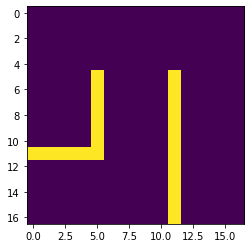

In [3]:

"""
    ==============================================
    GENERATE_MAZE
        input:
            n_cells (int) :     width of maze
    ==============================================
    Given a current cell as a parameter
    Mark the current cell as visited
    While the current cell has any unvisited neighbour cells
        Choose one of the unvisited neighbours
        Remove the wall between the current cell and the chosen cell
        Invoke the routine recursively for the chosen cell
"""
def generate_wide_maze(n_cells, cell_width=1, wall_width=1):
    maze = generate_maze(n_cells)
    
    # Cell widths
    nm = []
    for j in range(len(maze[0])):
        m = []
        for i in range(len(maze[0])):
            if i % 2 == 0:
                for x in range(cell_width-1):
                    m.append(maze[j][i])
            m.append(maze[j][i])
        nm.append(m)
    nnm = []
    nm = np.asarray(nm).T.tolist()
    for i in range(len(nm)):
        m = []
        for j in range(len(nm[0])):
            if j % 2 == 0:
                for x in range(cell_width-1):
                    m.append(nm[i][j])
            m.append(nm[i][j])
        nnm.append(m)
    return np.asarray(nnm, dtype=int)

# Display generated maze
maze = generate_wide_maze(3, cell_width=5, wall_width=2)
display(maze.shape, plt.imshow(maze))

# A* Algorithm
    reconstruct(source, current):
        total_path = {current}
        while current in source.keys:
            current = source[current]
            total_path.prepend(current)
        return total_path
        
    a*(start, goal, h)
    openset = {start}
    source = {}
    
    gscore = {default = inf}
    gscore[start] = 0
    
    fscore = {default = inf}
    fscore[start] = h[start]
    
    while openset != {}
        current = lowest fscore in openset
        if current = goal:
            return reconstruct_path(source, current)
        openset.remove(current)
        for each neighbour in current:
            tentative_gscore = gscore[current] + distance(current, neighbour)
            
            if tentative_gscore < gscore[neighbour]
                source[neighbour] = current
                gscore[neighbour] = tentative_gscore
                fscore[neighbour] = tentative_gscore + h(neighbour)
                
                if neighbor not in openset:
                    openset.add(neighbour)
    return None
            
        

In [13]:
normal_distance = lambda x,y : np.linalg.norm(np.array(x) - np.array(y))


def reconstruct_path(source, current):
    total_path = [current]
    while str(current) in source.keys():
        current = source[str(current)]
        total_path = [current] + total_path
    return total_path

"""
A* Pathfinding Algorithm
    input:
        start [int,int]: x,y coordinates for the starting position
        end  [int,int]: x,y coordinates for the end position
        h     [[int,int], [int,int]]: function used to calculate the distance between two points
"""

def a_star(cells, start=[1,1], end=[-2,-2], h = normal_distance, diagonals = False):
    MAZE_SIZE = len(cells)
    
    openset = {str(start)}
    closedset = []
    source = {}

    gscore = {}
    fscore = {}

    gscore[str(start)] = 0
    fscore[str(start)] = h(start, end)

    while openset != {}:
        # Get the lowest f-score in the open-set
        current = min(openset, key=lambda x: fscore.get(str(x), np.inf))
        current = eval(current)
        openset.remove(str(current))
        closedset.append(current)
        
        # If we're at the goal, reconstruct our path and return it
        if current == end:
            #return None
            return reconstruct_path(source, current)
        

        
        # Check each neighbouring cell and update the f/g scores
        if diagonals == True:
            neighbours = [0,0.5,1,1.5,2,2.5,3]
        else:
            neighbours = [0,1,2,3]
        
        neighbours = [np.array(np.round([np.sin(direction * np.pi / 2), np.cos(direction * np.pi / 2)]), dtype=int) 
                      + current for direction in neighbours]
        
        #np.random.shuffle(neighbours)        
        
        for neighbour in neighbours:
            # Ensure the neighbour is within bounds and is not a wall
            if neighbour[0] >= MAZE_SIZE or neighbour[0] < 0 \
                    or neighbour[1] >= MAZE_SIZE or neighbour[1] < 0 \
                    or cells[neighbour[0]][neighbour[1]] != 0 \
                    or neighbour.tolist() in closedset: continue
                
            tentative_gscore = gscore.get(str(current), np.inf) + 1
            
            if tentative_gscore < gscore.get(str(neighbour), np.inf):
                source[str(neighbour.tolist())] = current
                gscore[str(neighbour.tolist())] = tentative_gscore
                fscore[str(neighbour.tolist())] = tentative_gscore + h(neighbour, end)

                if str(neighbour) not in openset:
                    openset.add(str(neighbour.tolist()))
    return None

# Example usage

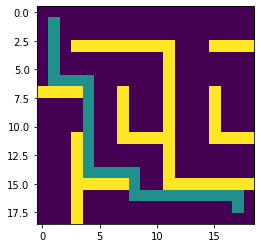

In [14]:
maze = generate_wide_maze(5,3)
start = [1,1]
end = [len(maze) - 2, len(maze) - 2]

path = a_star(np.asarray(maze, dtype=int), start=start, end=end)
solution = maze.copy()*2

for node in path:
    solution[node[0]][node[1]] = 1
    
display(plt.imshow(solution))

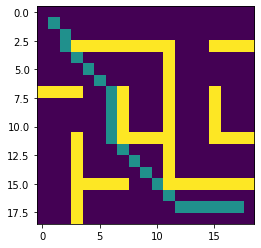

In [15]:
path = a_star(np.asarray(maze, dtype=int), start=start, end=end, diagonals=True)
solution = maze.copy()*2

for node in path:
    solution[node[0]][node[1]] = 1
    
display(plt.imshow(solution))